In [ ]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#abrir o dataset
df = pd.read_csv('/content/generatedBy_react-csv (1).csv', delimiter= ";")

In [ ]:
#leitura do cabeçalho e primeiras linhas
df.head()

,Data,Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm)
0,11/05/2023,0,19.2,20.0,19.2,73.0,74.0,71.0,14.3,14.7,14.2,904.5,904.6,904.3,0.0,38.0,1.4,NaN,0.0
1,11/05/2023,100,18.5,19.4,18.5,77.0,77.0,73.0,14.4,14.6,14.2,904.4,904.6,904.3,0.2,22.0,1.5,NaN,0.0
2,11/05/2023,200,18.2,19.3,18.1,82.0,82.0,77.0,15.1,15.7,14.5,904.2,904.4,904.2,0.0,180.0,1.5,NaN,0.0
3,11/05/2023,300,18.1,18.5,17.7,83.0,85.0,82.0,15.3,15.8,14.9,904.0,904.3,904.0,0.2,23.0,1.2,NaN,0.0
4,11/05/2023,400,17.8,18.3,17.7,84.0,85.0,83.0,15.1,15.7,15.0,903.5,904.0,903.5,0.0,36.0,0.9,NaN,0.0


In [ ]:
#leitura das informações da tabela
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3696 entries, 0 to 3695
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Data                  3696 non-null   object 
 1   Hora (UTC)            3696 non-null   int64  
 2   Temp. Ins. (C)        3681 non-null   float64
 3   Temp. Max. (C)        3681 non-null   float64
 4   Temp. Min. (C)        3681 non-null   float64
 5   Umi. Ins. (%)         3681 non-null   float64
 6   Umi. Max. (%)         3681 non-null   float64
 7   Umi. Min. (%)         3681 non-null   float64
 8   Pto Orvalho Ins. (C)  3681 non-null   float64
 9   Pto Orvalho Max. (C)  3681 non-null   float64
 10  Pto Orvalho Min. (C)  3681 non-null   float64
 11  Pressao Ins. (hPa)    3681 non-null   float64
 12  Pressao Max. (hPa)    3681 non-null   float64
 13  Pressao Min. (hPa)    3681 non-null   float64
 14  Vel. Vento (m/s)      3681 non-null   float64
 15  Dir. Vento (m/s)     

In [ ]:
#contagem de valores em branco (nulos ou vazios)
df.isnull().sum()

Data                       0
Hora (UTC)                 0
Temp. Ins. (C)            15
Temp. Max. (C)            15
Temp. Min. (C)            15
Umi. Ins. (%)             15
Umi. Max. (%)             15
Umi. Min. (%)             15
Pto Orvalho Ins. (C)      15
Pto Orvalho Max. (C)      15
Pto Orvalho Min. (C)      15
Pressao Ins. (hPa)        15
Pressao Max. (hPa)        15
Pressao Min. (hPa)        15
Vel. Vento (m/s)          15
Dir. Vento (m/s)          15
Raj. Vento (m/s)          15
Radiacao (KJ/m²)        1810
Chuva (mm)                15
dtype: int64

In [ ]:
#eliminando colunas desnecessárias
df.drop(columns=['Temp. Ins. (C)', "Umi. Ins. (%)", 'Pto Orvalho Ins. (C)', 'Pto Orvalho Max. (C)',
                 'Pto Orvalho Min. (C)', 'Pressao Ins. (hPa)', 'Pressao Max. (hPa)',
                 'Pressao Min. (hPa)', 'Vel. Vento (m/s)', 'Dir. Vento (m/s)', 'Raj. Vento (m/s)'], inplace=True)

In [ ]:
#leitura das informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3696 entries, 0 to 3695
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Data              3696 non-null   object 
 1   Hora (UTC)        3696 non-null   int64  
 2   Temp. Max. (C)    3681 non-null   float64
 3   Temp. Min. (C)    3681 non-null   float64
 4   Umi. Max. (%)     3681 non-null   float64
 5   Umi. Min. (%)     3681 non-null   float64
 6   Radiacao (KJ/m²)  1886 non-null   float64
 7   Chuva (mm)        3681 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 231.1+ KB


In [ ]:
#contagem de valores em branco (nulos ou vazios)
df.isnull().sum()

Data                   0
Hora (UTC)             0
Temp. Max. (C)        15
Temp. Min. (C)        15
Umi. Max. (%)         15
Umi. Min. (%)         15
Radiacao (KJ/m²)    1810
Chuva (mm)            15
dtype: int64

In [ ]:
#corrigir os nomes das tabelas
df.columns = df.columns.str.replace('. ', '_')
df.columns = df.columns.str.replace('(', '')
df.columns = df.columns.str.replace(')', '')
df.columns = df.columns.str.replace('m²', 'm2')
df.columns = df.columns.str.replace('/', '_')
print(df.columns)

Index(['Data', 'Hor_UTC', 'Temp_Max_C', 'Temp_Min_C', 'Umi_Max_%', 'Umi_Min_%',
       'Radiaca_KJ_m2', 'Chuv_mm'],
      dtype='object')


In [ ]:
#corrigir valores em branco (nulos ou vazios)
df.loc[df['Hor_UTC'] <= 1000, 'Radiaca_KJ_m2'] = df['Radiaca_KJ_m2'].fillna(0.0)
df.loc[df['Hor_UTC'] >= 1900, 'Radiaca_KJ_m2'] = df["Radiaca_KJ_m2"].fillna(0.0)
df['Temp_Max_C'] = df['Temp_Max_C'].fillna(method='ffill')
df['Temp_Min_C'] = df['Temp_Min_C'].fillna(method='ffill')
df['Umi_Max_%'] = df['Umi_Max_%'].fillna(method='ffill')
df['Umi_Min_%'] = df['Umi_Min_%'].fillna(method='ffill')
df['Chuv_mm'] = df['Chuv_mm'].fillna(method='ffill')
df['Radiaca_KJ_m2'] = df['Radiaca_KJ_m2'].fillna(method='ffill')
df.loc[df['Hor_UTC'] == 0, 'Hor_UTC'] = df['Hor_UTC'].fillna(000)
df['Hor_UTC'] = df['Hor_UTC'].drop(df['Hor_UTC'].index)
df

,Data,Hor_UTC,Temp_Max_C,Temp_Min_C,Umi_Max_%,Umi_Min_%,Radiaca_KJ_m2,Chuv_mm
0,11/05/2023,NaN,20.0,19.2,74.0,71.0,0.0,0.0
1,11/05/2023,NaN,19.4,18.5,77.0,73.0,0.0,0.0
2,11/05/2023,NaN,19.3,18.1,82.0,77.0,0.0,0.0
3,11/05/2023,NaN,18.5,17.7,85.0,82.0,0.0,0.0
4,11/05/2023,NaN,18.3,17.7,85.0,83.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3691,11/10/2023,NaN,32.7,31.0,46.0,36.0,1863.2,0.0
3692,11/10/2023,NaN,32.7,31.0,46.0,36.0,0.0,0.0
3693,11/10/2023,NaN,32.7,31.0,46.0,36.0,0.0,0.0
3694,11/10/2023,NaN,32.7,31.0,46.0,36.0,0.0,0.0


In [ ]:
# df['Data'] = pd.date_range('11/05/2023', periods=len(df['Hor_UTC']), freq='H')
# df["Hor_UTC"] = pd.to_datetime(df["Hor_UTC"], format="%H:%M")
# df["Hor_UTC"] = pd.to_datetime(df["Hor_UTC"], format="%d/%m %H:%M", dayfirst=True,utc=True)

#corrigir o campo data
df['Data'] = pd.date_range('2023-05-11', periods=len(df['Hor_UTC']), freq='H')
df

,Data,Hor_UTC,Temp_Max_C,Temp_Min_C,Umi_Max_%,Umi_Min_%,Radiaca_KJ_m2,Chuv_mm
0,2023-05-11 00:00:00,NaN,20.0,19.2,74.0,71.0,0.0,0.0
1,2023-05-11 01:00:00,NaN,19.4,18.5,77.0,73.0,0.0,0.0
2,2023-05-11 02:00:00,NaN,19.3,18.1,82.0,77.0,0.0,0.0
3,2023-05-11 03:00:00,NaN,18.5,17.7,85.0,82.0,0.0,0.0
4,2023-05-11 04:00:00,NaN,18.3,17.7,85.0,83.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3691,2023-10-11 19:00:00,NaN,32.7,31.0,46.0,36.0,1863.2,0.0
3692,2023-10-11 20:00:00,NaN,32.7,31.0,46.0,36.0,0.0,0.0
3693,2023-10-11 21:00:00,NaN,32.7,31.0,46.0,36.0,0.0,0.0
3694,2023-10-11 22:00:00,NaN,32.7,31.0,46.0,36.0,0.0,0.0


In [ ]:
#eliminar a coluna "hora"
df = df.drop('Hor_UTC', axis=1)
#adicionar colunas de medias das temperaturas e umidade
Temp = df[['Temp_Max_C', 'Temp_Min_C']].mean(axis=1)
Umi = df[['Umi_Max_%', 'Umi_Min_%']].mean(axis=1)
df['Temp'] = Temp
df['Umi'] = Umi
df

,Data,Temp_Max_C,Temp_Min_C,Umi_Max_%,Umi_Min_%,Radiaca_KJ_m2,Chuv_mm,Temp,Umi
0,2023-05-11 00:00:00,20.0,19.2,74.0,71.0,0.0,0.0,19.60,72.5
1,2023-05-11 01:00:00,19.4,18.5,77.0,73.0,0.0,0.0,18.95,75.0
2,2023-05-11 02:00:00,19.3,18.1,82.0,77.0,0.0,0.0,18.70,79.5
3,2023-05-11 03:00:00,18.5,17.7,85.0,82.0,0.0,0.0,18.10,83.5
4,2023-05-11 04:00:00,18.3,17.7,85.0,83.0,0.0,0.0,18.00,84.0
...,...,...,...,...,...,...,...,...,...
3691,2023-10-11 19:00:00,32.7,31.0,46.0,36.0,1863.2,0.0,31.85,41.0
3692,2023-10-11 20:00:00,32.7,31.0,46.0,36.0,0.0,0.0,31.85,41.0
3693,2023-10-11 21:00:00,32.7,31.0,46.0,36.0,0.0,0.0,31.85,41.0
3694,2023-10-11 22:00:00,32.7,31.0,46.0,36.0,0.0,0.0,31.85,41.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3696 entries, 0 to 3695
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Data           3696 non-null   datetime64[ns]
 1   Temp_Max_C     3696 non-null   float64       
 2   Temp_Min_C     3696 non-null   float64       
 3   Umi_Max_%      3696 non-null   float64       
 4   Umi_Min_%      3696 non-null   float64       
 5   Radiaca_KJ_m2  3696 non-null   float64       
 6   Chuv_mm        3696 non-null   float64       
 7   Temp           3696 non-null   float64       
 8   Umi            3696 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 260.0 KB


In [ ]:
#leitura em serie das medias de temperatura dos meses
tem_max = df.groupby(df['Data'].dt.month)['Temp_Max_C'].mean()
radiacao= df.groupby(df['Data'].dt.month)['Radiaca_KJ_m2'].mean()
print(tem_max, radiacao)

Data
5     19.423810
6     18.898333
7     20.641667
8     22.606048
9     25.926111
10    25.519697
Name: Temp_Max_C, dtype: float64 Data
5     675.470635
6     595.942917
7     654.224597
8     690.547312
9     831.812639
10    781.235985
Name: Radiaca_KJ_m2, dtype: float64


In [ ]:
#dados estatístico das colunas
df.describe()

,Temp_Max_C,Temp_Min_C,Umi_Max_%,Umi_Min_%,Radiaca_KJ_m2,Chuv_mm,Temp,Umi
count,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000
mean,21.909280,20.561986,56.994859,51.783009,696.747240,0.045346,21.235633,54.388934
std,4.860769,4.608753,18.659334,18.916453,989.084744,0.476682,4.719802,18.697388
min,9.500000,8.600000,15.000000,13.000000,0.000000,0.000000,9.200000,14.000000
25%,18.300000,17.000000,42.000000,36.000000,0.000000,0.000000,17.650000,39.500000
50%,21.500000,20.200000,57.000000,51.000000,1.100000,0.000000,20.850000,53.750000
75%,25.200000,23.600000,69.000000,64.000000,1463.625000,0.000000,24.400000,66.500000
max,37.000000,35.700000,96.000000,96.000000,3613.900000,11.000000,36.350000,96.000000


In [ ]:
#correlação entre as colunas
df.corr()

,Temp_Max_C,Temp_Min_C,Umi_Max_%,Umi_Min_%,Radiaca_KJ_m2,Chuv_mm,Temp,Umi
Temp_Max_C,1.000000,0.987373,-0.694690,-0.718948,0.561778,-0.055371,0.997005,-0.710324
Temp_Min_C,0.987373,1.000000,-0.693319,-0.693980,0.516508,-0.057292,0.996668,-0.697009
Umi_Max_%,-0.694690,-0.693319,1.000000,0.980777,-0.424792,0.179138,-0.696222,0.995116
Umi_Min_%,-0.718948,-0.693980,0.980777,1.000000,-0.467774,0.172024,-0.709037,0.995248
Radiaca_KJ_m2,0.561778,0.516508,-0.424792,-0.467774,1.000000,-0.061478,0.541456,-0.448591
Chuv_mm,-0.055371,-0.057292,0.179138,0.172024,-0.061478,1.000000,-0.056484,0.176407
Temp,0.997005,0.996668,-0.696222,-0.709037,0.541456,-0.056484,1.000000,-0.706075
Umi,-0.710324,-0.697009,0.995116,0.995248,-0.448591,0.176407,-0.706075,1.000000


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_0, *['Temp_Max_C'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['Temp_Min_C'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['Umi_Max_%'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['Umi_Min_%'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_4, *[[['Temp_Max_C', 'Temp_Min_C'], ['Temp_Min_C', 'Umi_Max_%'], ['Umi_Max_%', 'Umi_Min_%'], ['Umi_Min_%', 'Radiaca_KJ_m2']]], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_5, *['Temp_Max_C'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_6, *['Temp_Min_C'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_7, *['Umi_Max_%'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_8, *['Umi_Min_%'], **{})
chart

<function matplotlib.pyplot.show(close=None, block=None)>

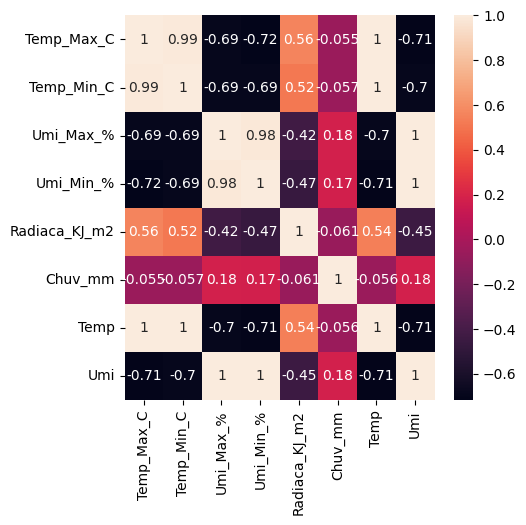

In [ ]:
#plot do mapa de calor das correlações
plt.rcParams["figure.figsize"] = (5,5)
ax = sns.heatmap(df.corr(), annot= True)
plt.show

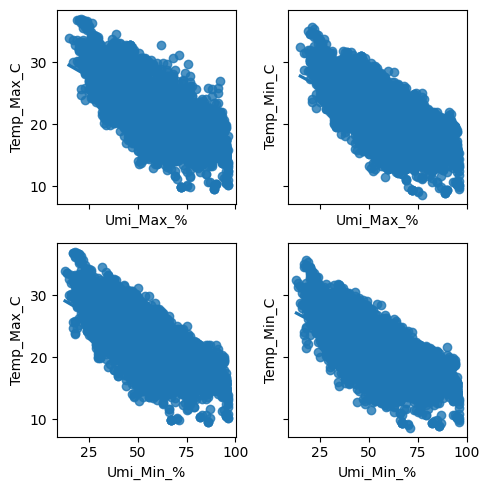

In [ ]:
#plot o mapa de histograma

# Criar uma figura e quatro eixos
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)

# Plotar cada gráfico de regressão em um eixo diferente
sns.regplot(x='Umi_Max_%', y='Temp_Max_C', data=df, ax=ax1)
sns.regplot(x='Umi_Max_%', y='Temp_Min_C', data=df, ax=ax2)
sns.regplot(x='Umi_Min_%', y='Temp_Max_C', data=df, ax=ax3)
sns.regplot(x='Umi_Min_%', y='Temp_Min_C', data=df, ax=ax4)

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Mostrar a figura
plt.show()

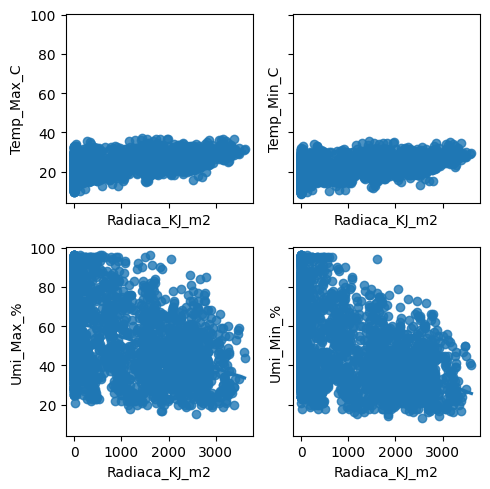

In [ ]:
#plot o mapa de histograma
fig, ((ax5, ax6), (ax7, ax8)) = plt.subplots(2, 2, sharex=True, sharey=True)
sns.regplot(x='Radiaca_KJ_m2', y='Temp_Max_C', data=df, ax=ax5)
sns.regplot(x='Radiaca_KJ_m2', y='Temp_Min_C', data=df, ax=ax6)
sns.regplot(x='Radiaca_KJ_m2', y='Umi_Max_%', data=df, ax=ax7)
sns.regplot(x='Radiaca_KJ_m2', y='Umi_Min_%', data=df, ax=ax8)

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Mostrar a figura
plt.show()

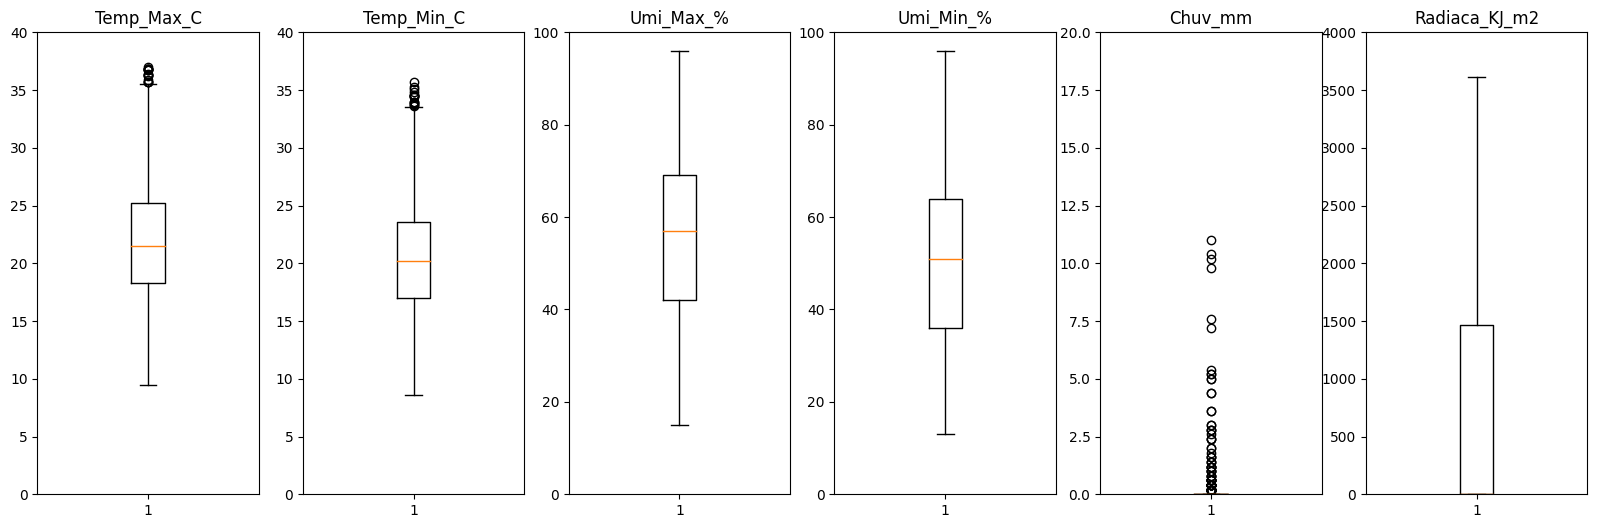

In [ ]:
# Cria uma figura com cinco eixos em uma linha
fig, axes = plt.subplots(1, 6, figsize=(20, 6))

# Plota cada coluna em um eixo separado
axes[0].boxplot(df['Temp_Max_C'])
axes[1].boxplot(df['Temp_Min_C'])
axes[2].boxplot(df['Umi_Max_%'])
axes[3].boxplot(df['Umi_Min_%'])
axes[4].boxplot(df['Chuv_mm'])
axes[5].boxplot(df['Radiaca_KJ_m2'])

# Ajusta os limites dos eixos y para melhor visualização
axes[0].set_ylim(0, 40)
axes[1].set_ylim(0, 40)
axes[2].set_ylim(0, 100)
axes[3].set_ylim(0, 100)
axes[4].set_ylim(0, 20)
axes[5].set_ylim(0, 4000)

# Adiciona títulos aos eixos
axes[0].set_title('Temp_Max_C')
axes[1].set_title('Temp_Min_C')
axes[2].set_title('Umi_Max_%')
axes[3].set_title('Umi_Min_%')
axes[4].set_title('Chuv_mm')
axes[5].set_title('Radiaca_KJ_m2')
# Mostra o gráfico
plt.show()

In [ ]:
print('DETECTADO OUTLIERS E CORRIGINDO')
print('\n')
#ENCONTRANDO O Q1 E Q3
print('ENCONTRANDO O Q1 E Q3')
temp_MAX = df.get(['Temp_Max_C'])
Q1_temp_max = np.percentile(temp_MAX, 25)
Q3_temp_max = np.percentile(temp_MAX, 75)
print('Q1: %.2f' %Q1_temp_max)
print('Q3: %.2f' %Q3_temp_max)

DETECTADO OUTLIERS E CORRIGINDO


ENCONTRANDO O Q1 E Q3
Q1: 18.30
Q3: 25.20


In [ ]:
print('DETECTADO OUTLIERS E CORRIGINDO')
print('\n')
#ENCONTRANDO O Q1 E Q3
print('ENCONTRANDO O Q1 E Q3')
temp_MIN = df.get(['Temp_Min_C'])
Q1_temp_MIN = np.percentile(temp_MIN, 25)
Q3_temp_MIN = np.percentile(temp_MIN, 75)
print('Q1: %.2f' %Q1_temp_MIN)
print('Q3: %.2f' %Q3_temp_MIN)

DETECTADO OUTLIERS E CORRIGINDO


ENCONTRANDO O Q1 E Q3
Q1: 17.00
Q3: 23.60


In [ ]:
print('DETECTADO OUTLIERS E CORRIGINDO')
print('\n')
#ENCONTRANDO O Q1 E Q3
print('ENCONTRANDO O Q1 E Q3')
chuva = df.get(['Chuv_mm'])
Q1_chuva = np.percentile(chuva, 25)
Q3_chuva = np.percentile(chuva, 75)
print('Q1: %.2f' %Q1_chuva)
print('Q3: %.2f' %Q3_chuva)

DETECTADO OUTLIERS E CORRIGINDO


ENCONTRANDO O Q1 E Q3
Q1: 0.00
Q3: 0.00


In [ ]:
print('CALCULANDO O INTERVALO INTERQUARTIL')
C= 1.5
IIQ = Q3_temp_MIN - Q1_temp_MIN
LI = Q1_temp_MIN - C*IIQ
LS = Q3_temp_MIN + C*IIQ
print('IIQ:  %.2f' %IIQ)
print('LIMITES:')
print('INFERIOR:  %.2f' %LI)
print('SUPERIOR:  %.2f' %LS)

CALCULANDO O INTERVALO INTERQUARTIL
IIQ:  6.60
LIMITES:
INFERIOR:  7.10
SUPERIOR:  33.50


In [ ]:
#criar novo dataset com as informações modificadas
df.to_csv('informacoes_climaticas_franca.csv')

In [ ]:
# Encontrar as variações mensais de temperatura, chuva, radiação e umidade
# Ler a tabela informacoes_climaticas_franca de um arquivo csv
informacoes_climaticas_franca = pd.read_csv("informacoes_climaticas_franca.csv")

# Converter a coluna Data para o tipo datetime
informacoes_climaticas_franca["Data"] = pd.to_datetime(informacoes_climaticas_franca["Data"])

# Agrupar os dados por mês e somar a coluna Chuv_mm
chuva_por_mes = informacoes_climaticas_franca.groupby(pd.Grouper(key="Data", freq="M"))["Chuv_mm"].sum()
temperatura_por_mes = informacoes_climaticas_franca.groupby(pd.Grouper(key="Data", freq="M"))["Temp"].sum()
umidade_por_mes = informacoes_climaticas_franca.groupby(pd.Grouper(key="Data", freq="M"))["Umi"].sum()
radiacao_por_mes = informacoes_climaticas_franca.groupby(pd.Grouper(key="Data", freq="M"))["Radiaca_KJ_m2"].sum()

# Calcular a variação de chuva entre o mês atual e o mês anterior
variacao_de_chuva = chuva_por_mes.diff() / chuva_por_mes.shift()
variacao_de_temp = temperatura_por_mes.diff() / temperatura_por_mes.shift()
variacao_de_umi = umidade_por_mes.diff() / umidade_por_mes.shift()
variacao_de_radiacao = radiacao_por_mes.diff() / radiacao_por_mes.shift()

# Converter valores de string para float com 2 casas decimais
variacao_de_chuva = variacao_de_chuva.apply(lambda x: round(x, 2))
variacao_de_chuva = variacao_de_chuva.apply(lambda x: f"{x:,}")

variacao_de_temp = variacao_de_temp.apply(lambda x: round(x, 2))
variacao_de_temp = variacao_de_temp.apply(lambda x: f"{x:,}")

variacao_de_umi = variacao_de_umi.apply(lambda x: round(x, 2))
variacao_de_umi = variacao_de_umi.apply(lambda x: f"{x:,}")

variacao_de_radiacao = variacao_de_radiacao.apply(lambda x: round(x, 2))
variacao_de_radiacao = variacao_de_radiacao.apply(lambda x: f"{x:,}")


# Mostrar o resultado
print(variacao_de_chuva)
print(variacao_de_temp)
print(variacao_de_umi)
print(variacao_de_radiacao)

Data
2023-05-31      nan
2023-06-30    -0.88
2023-07-31      2.2
2023-08-31     0.38
2023-09-30     0.08
2023-10-31     3.29
Freq: M, Name: Chuv_mm, dtype: object
Data
2023-05-31      nan
2023-06-30     0.39
2023-07-31     0.13
2023-08-31      0.1
2023-09-30     0.11
2023-10-31    -0.64
Freq: M, Name: Temp, dtype: object
Data
2023-05-31      nan
2023-06-30     0.47
2023-07-31    -0.12
2023-08-31    -0.02
2023-09-30    -0.08
2023-10-31    -0.49
Freq: M, Name: Umi, dtype: object
Data
2023-05-31      nan
2023-06-30     0.26
2023-07-31     0.13
2023-08-31     0.06
2023-09-30     0.17
2023-10-31    -0.66
Freq: M, Name: Radiaca_KJ_m2, dtype: object


In [ ]:
# Criar um dataframe com as séries de variação
df_variacao = pd.concat([variacao_de_chuva, variacao_de_temp, variacao_de_umi, variacao_de_radiacao], axis=1)
df_variacao.columns = ["variacao_de_chuva", "variacao_de_temp", "variacao_de_umi", "variacao_de_radiacao"]

# Mostrar o dataframe
print(df_variacao)
# Download do dataframe
df_variacao.to_csv('df_variacao.csv')

           variacao_de_chuva variacao_de_temp variacao_de_umi  \
Data                                                            
2023-05-31               nan              nan             nan   
2023-06-30             -0.88             0.39            0.47   
2023-07-31               2.2             0.13           -0.12   
2023-08-31              0.38              0.1           -0.02   
2023-09-30              0.08             0.11           -0.08   
2023-10-31              3.29            -0.64           -0.49   

           variacao_de_radiacao  
Data                             
2023-05-31                  nan  
2023-06-30                 0.26  
2023-07-31                 0.13  
2023-08-31                 0.06  
2023-09-30                 0.17  
2023-10-31                -0.66  


In [ ]:
df_variacao.head()

,variacao_de_chuva,variacao_de_temp,variacao_de_umi,variacao_de_radiacao
Data,,,,
2023-05-31,nan,nan,nan,nan
2023-06-30,-0.88,0.39,0.47,0.26
2023-07-31,2.2,0.13,-0.12,0.13
2023-08-31,0.38,0.1,-0.02,0.06
2023-09-30,0.08,0.11,-0.08,0.17
